# Vacinação Geral no Brasil

Projeto avaliando brevemente quais as vacinas mais aplicadas nos brasileiros de 1994 a 2019 utilizando os dados do DATASUS.
Tentarei ver se existe prevalência de alguma vacina específica por região ou estado do país.

# Importação das Bibliotecas e Configurações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from wordcloud import WordCloud
from PIL import Image
import warnings

warnings.filterwarnings('ignore')

In [2]:
# formatar os números para mostrarem duas casa decimais
pd.options.display.float_format = '{:.2f}'.format

# configurações de cores
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# configurações da fonte utilizada nos gráficos
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Arial:bold'
plt.rcParams['mathtext.it'] = 'Arial:italic'

# Limpeza dos Dados

link do notebook

# Panorama Geral

Vamos inicialmente dar um panorama geral de como andam as coberturas vacinais no país, além de analisarmos quais as vacinas mais aplicadas em números absolutos.

**Hipótese 1**
- A cobertura vacinal vem crescendo anualmente em todo o país.
**Hipótese 2**
- Vacinas que devem ser aplicar em bebês logo após o nascimento, como a [BCG e da Hepatite B](https://www.unimedlondrina.com.br/noticias/tudo-saude/07/06/2018/vacinas-importantes-recem-nascidos/), principalmente, possuem maior cobertura vacinal e também maior valor absoluto de apliacações.

## Cobertura Vacinal por Região do Brasil, de 1994 a 2019

Aqui consideramos a cobertura vacinal de todos os imunizantes analisados juntos.

Como já fizemos a limpeza anteriormente, podemos já importar o dataset e analisá-lo.

In [3]:
cv_reg = pd.read_csv('../dados/clean/cv_reg.csv', encoding = 'ISO-8859-1', index_col = 'Unnamed: 0')

In [4]:
cv_reg.head()

,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Total
1994,31.03,40.52,55.22,51.60,25.84,38.27
1995,41.67,43.78,46.43,51.24,45.10,45.70
1996,55.20,50.91,44.66,53.84,52.54,50.00
1997,68.57,65.71,70.58,71.50,69.92,68.95
1998,73.28,66.45,74.42,65.09,76.53,70.65


A coluna ```Total``` refere-se à média das 5 regiões, então podemos usá-la como métrica para avalliar a cobertura vacinal do país levando em consideração todas as vacinas disponíveis na base de dados.

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


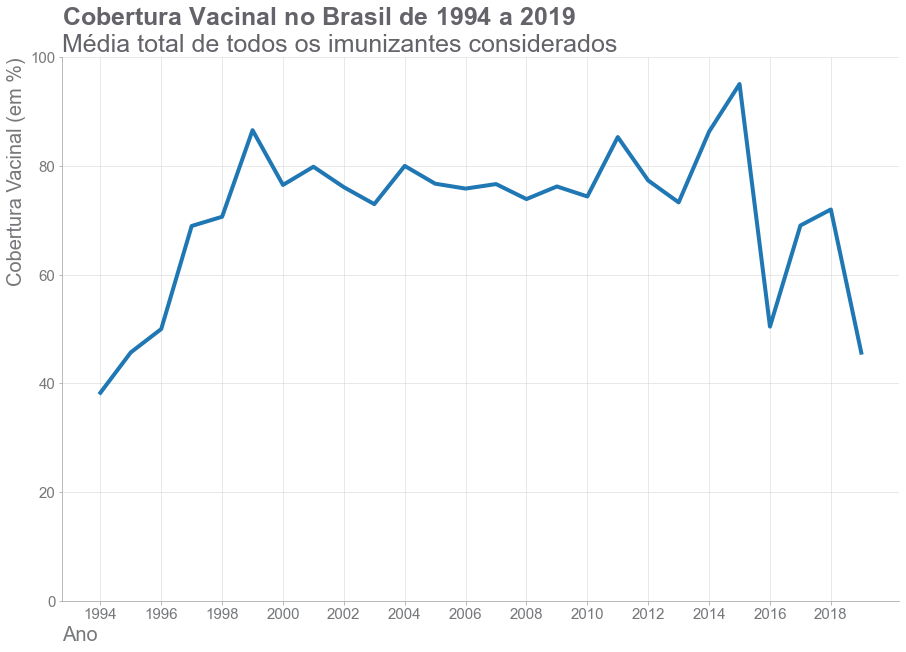

In [5]:
ax = cv_reg['Total'].plot(figsize = (15, 10), linewidth = 4)
plt.ylim(0, 100)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)

plt.title('$\\bf{Cobertura\ Vacinal\ no\ Brasil\ de\ 1994\ a\ 2019}$\nMédia total de todos os imunizantes considerados',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.ylabel('Cobertura Vacinal (em %)', loc = 'top', fontsize = 20, color = GRAY5)
plt.xlabel('Ano', loc = 'left', fontsize = 20, color = GRAY5)

ax.set_xticks(range(1994, 2020, 2))

plt.grid(color = 'lightgrey', linewidth = 0.5)

plt.show()

Algumas considerações e observações que obtemos não só desse gráfico, mas também do conhecimento que temos da base de dados:
- Os dados foram atualizados pela última vez em **04/09/2019**, como visto no próprio site. Ou seja, as informações sobre 2019 estão incompletas.
- O que aconteceu em **2016** que explique uma **queda tão brusca** na cobertura vacinal? Pelo nosso conhecimento dessa base de dados do Governo, sabemos que os dados sofreram diversão mudanças de infraestrutura ao longo dos anos, até mesmo com inserção duplicada de valores. Isso tudo é explicado nas notas de rodapé do site de onde os dados brutos foram retirados. Então esse ano atípico de 2016 pode muito bem ser explicado por **inconsistências** na base de dados.

De **1994 até 2015**, aproximadamente, parece que temos dados mais consistentes. Vamos então observar esse período de tempo.

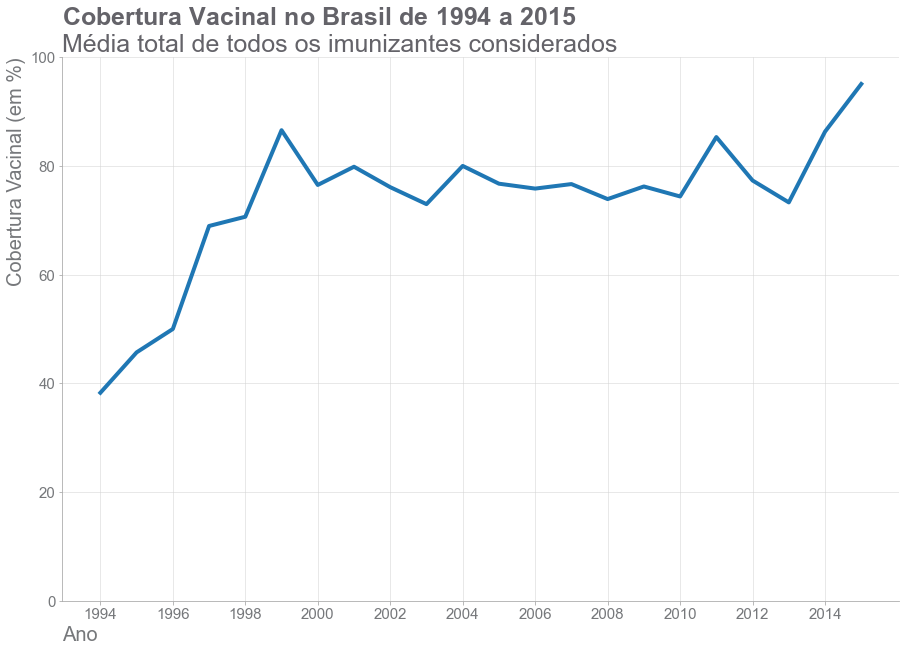

In [15]:
ax = cv_reg[:-4]['Total'].plot(figsize = (15, 10), linewidth = 4)
plt.ylim(0, 100)
ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
sns.despine()

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY5)

plt.title('$\\bf{Cobertura\ Vacinal\ no\ Brasil\ de\ 1994\ a\ 2015}$\nMédia total de todos os imunizantes considerados',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.ylabel('Cobertura Vacinal (em %)', loc = 'top', fontsize = 20, color = GRAY5)
plt.xlabel('Ano', loc = 'left', fontsize = 20, color = GRAY5)

ax.set_xticks(range(1994, 2016, 2))

plt.grid(color = 'lightgrey', linewidth = 0.5)
    
plt.show()

Agora fica mais fácil observar como se comporta a cobertura vacinal no Brasil nesse período. De 1994 a 1999, é evidente que houve uma alta na porcentagem analisada. De 1999 a 2013, houve uma certa estabilidade nesse valor, apenas com um pequeno aumento em 2011. A partir de 2013 até 2015, já voltamos a ter uma subida na cobertura vacinal.

**Seria isso suficiente para responder à nossa Hipótese 1 de que a cobertura vacinal vem crescendo anualmente em todo o país?**
Não, pois, por mais que tenhamos saído de uma média de menos de 40% em 1994 e chegado a quase 100% em 2015, de um ano para o outro também ocorreram diversas quedas nesse número. No geral sim, houve um expressivo aumento na cobertura vacinal de 1994 a 2015, mas não anualmente, e sim como um todo.

Agora vamos avaliar a cobertura vacinal de cada vacina específica. Como 2015 é o ano que atingiu maior cobertura vacinal em todo o período analisado, vamos utilizá-lo para análise.

In [7]:
cv_reg_ano = pd.read_csv('../dados/clean/cv_reg_ano.csv', encoding = 'ISO-8859-1')

In [8]:
cv_reg_ano.head()

,Imuno,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,BCG,88.29,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,95.55,97.12,97.72,52.95,100.00
1,Hepatite B em crianças até 30 dias,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,88.54,90.93,81.75,85.20,86.73,48.33,68.79
2,Rotavírus Humano,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,87.06,86.37,93.52,93.44,95.35,88.98,84.65,89.76,52.47,58.57
3,Meningococo C,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,100.00,96.18,99.70,96.36,98.19,91.68,87.04,87.50,53.66,61.23
4,Hepatite B,8.85,10.50,16.50,5.79,12.63,83.50,91.08,91.88,91.47,...,97.71,96.67,100.00,96.42,97.74,100.00,86.29,92.91,55.93,78.46


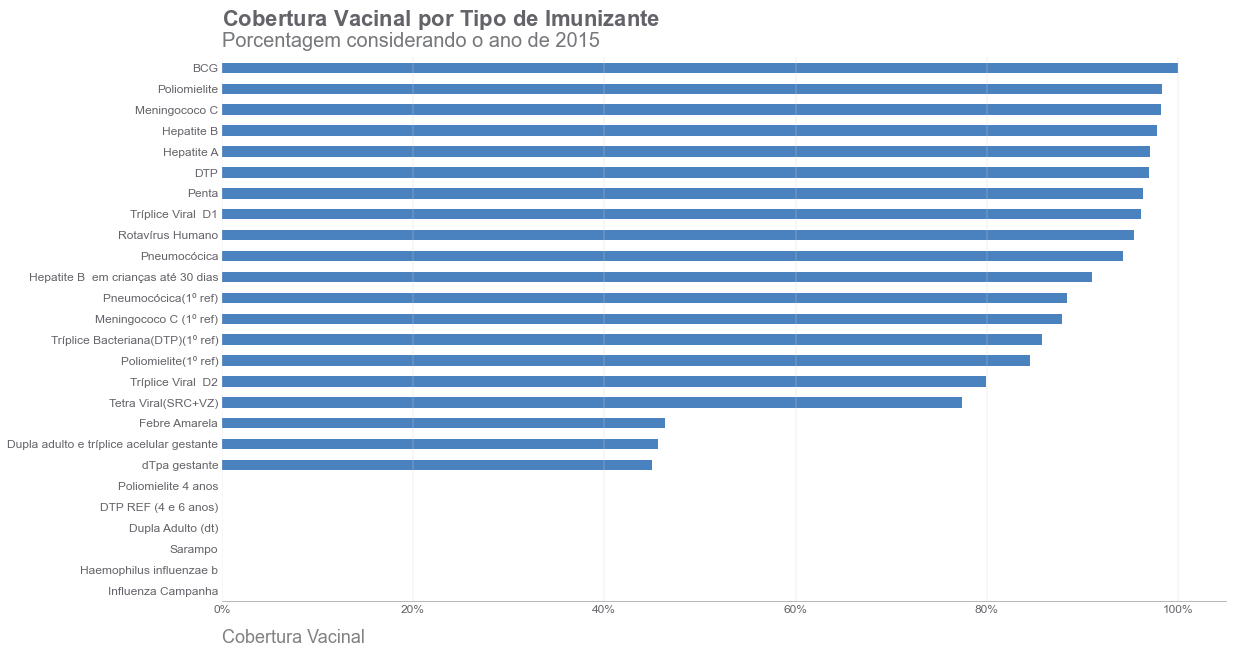

In [16]:
ax = cv_reg_ano.set_index('Imuno').sort_values('2015')['2015'].T.plot(figsize = (18, 10), kind = 'barh', color = BLUE2)

ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
sns.despine(left = True)

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(12)
    i.set_color(GRAY4)

ax.yaxis.label.set_visible(False)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(100))
plt.grid(axis = 'x', zorder = 1, linewidth = 0.35, color = 'lightgray')

plt.text(0, 27, '$\\bf{Cobertura\ Vacinal\ por\ Tipo\ de\ Imunizante}$',
         fontsize = 22, color = GRAY4)
plt.text(0, 26, 'Porcentagem considerando o ano de 2015',
         fontsize = 20, color = GRAY5)

plt.text(0, -2.5, 'Cobertura Vacinal', fontsize = 18, color = GRAY6)

plt.show()

Esse gráfico já nos ajudar a validar a **Hipótese 2**, pois vemos que realmente as vacinas que possuem uma maior cobertura vacinal são aquelas aplicadas em recém-nascidos, como a vacina BCG e a da Hepatite B, entre outras.

Vacinas com valores de 0% na cobertura vacinal tiveram sua aplicação finalizada antes do período analisado, a saber 2015.

Para completarmos a **Hipótese 2**, basta analisarmos os valores absolutos dos imunizantes aplicados. Vamos lá?!

Para isso, usarei a soma total de todas as aplicações de imunizantes de 1994 a 2019.

In [10]:
tipo_regiao = pd.read_csv('../dados/clean/tipo_regiao.csv', encoding = 'ISO-8859-1')

In [11]:
tipo_regiao.sort_values('Total', ascending = False).head()

,Imuno,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Total
0,BCG,8934021,25716922,30399265,10320185,6313847,81684240
7,Poliomielite,7274884,22142316,28092416,9575853,5616541,72702010
17,DTP,6473825,19952727,25733142,8974200,5145825,66279719
14,Tríplice Viral D1,5860559,18272998,24617230,7824108,4776620,61351515
4,Hepatite B,6211709,17317816,23733605,8632675,4667998,60563803


Como seria uma uma boa forma de visualizar esse total de imunizantes aplicados? Um clássico gráfico de barras, claro! Mas antes, vamos tentar visualizar com uma "wordcloud", _just for fun!_

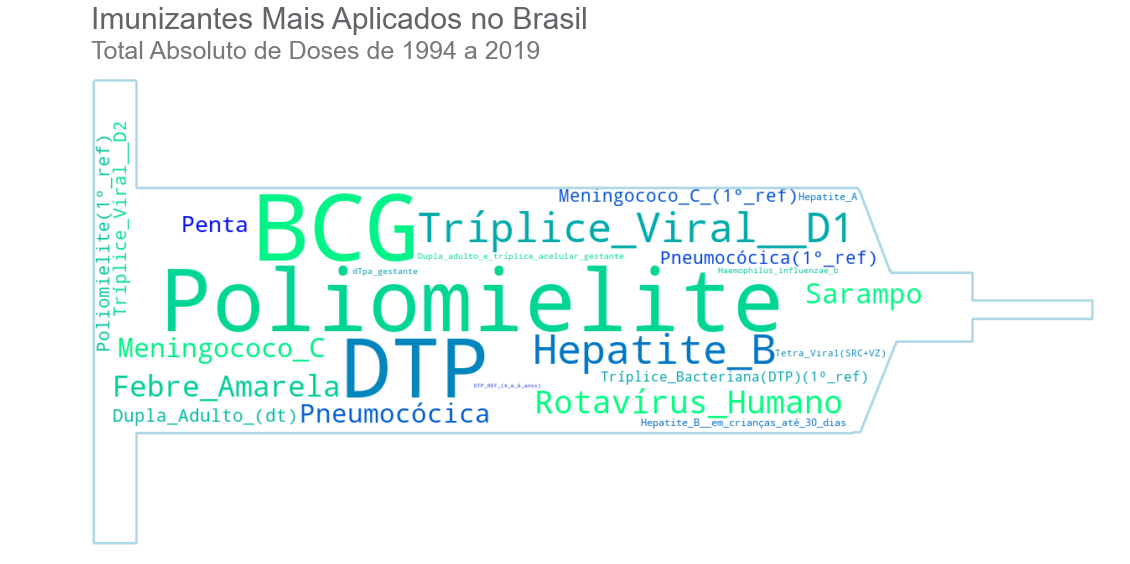

In [12]:
tipo_regiao['Imuno'] = tipo_regiao['Imuno'].str.replace(' ', '_')
tipo_regiao = tipo_regiao[['Imuno', 'Total']]

d = {}
for Imuno, Total in tipo_regiao.values:
    d[Imuno] = Total

vaccine_mask = np.array(Image.open('../other/vacina.png'))
    
wordcloud = WordCloud(background_color = 'white',
                      width = 1000,
                      height = 500,
                      mask = vaccine_mask,
                      contour_width = 3,
                      contour_color = 'lightblue',
                      colormap = 'winter')

wordcloud.generate_from_frequencies(frequencies = d)
plt.figure(figsize = (20, 15))
plt.text(100, -50, 'Imunizantes Mais Aplicados no Brasil', fontsize = 30, color = GRAY4)
plt.text(100, -15, 'Total Absoluto de Doses de 1994 a 2019', fontsize = 25, color = GRAY5)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Se formos nos basear pelo tamanho da fonte, vemos que a vacina BCG e a da Poliomielite são as mais aplicadas, seguidas pelo imunizante DPT. Vamos confirmar isso em uma visualização mais tradicional abaixo.

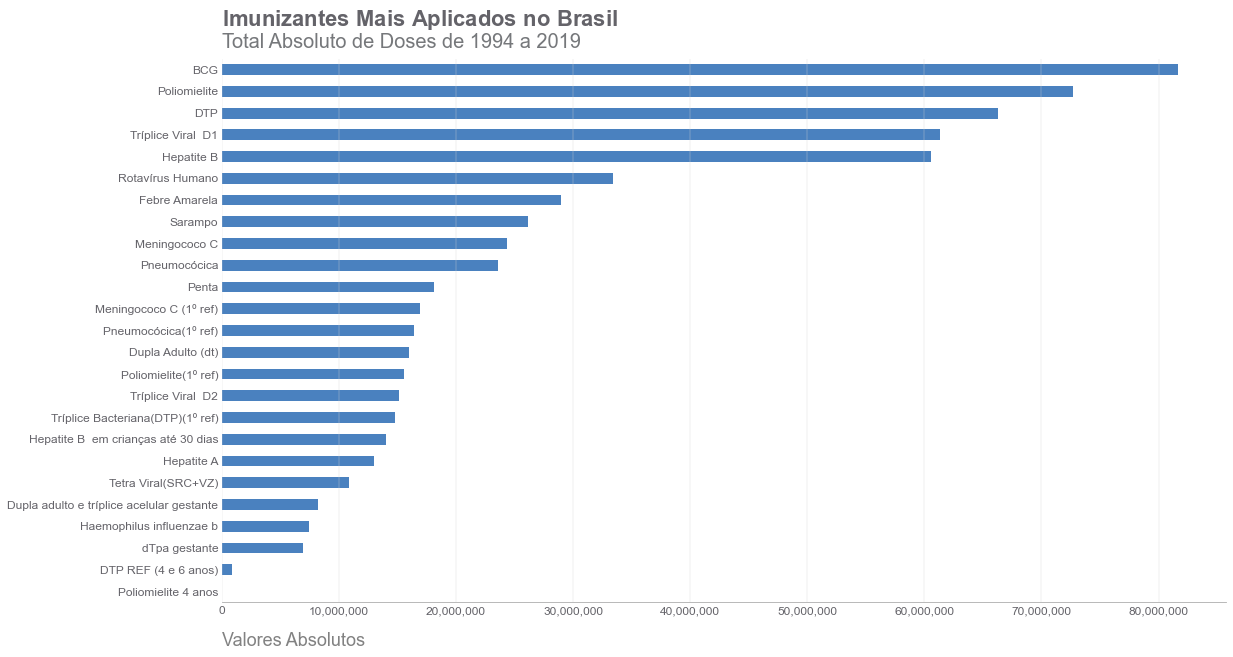

In [17]:
tipo_regiao['Imuno'] = tipo_regiao['Imuno'].str.replace('_', ' ')

ax = tipo_regiao.set_index('Imuno').sort_values('Total')['Total'].T.plot(figsize = (18, 10), kind = 'barh', color = BLUE2)

ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
sns.despine(left = True)

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(12)
    i.set_color(GRAY4)

ax.yaxis.label.set_visible(False)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
plt.grid(axis = 'x', zorder = 1, linewidth = 0.35, color = 'lightgray')

plt.text(-30, 26, '$\\bf{Imunizantes\ Mais\ Aplicados\ no\ Brasil}$',
         fontsize = 22, color = GRAY4)
plt.text(-30, 25, 'Total Absoluto de Doses de 1994 a 2019',
         fontsize = 20, color = GRAY5)

plt.text(0, -2.5, 'Valores Absolutos', fontsize = 18, color = GRAY6)

plt.show()

Finalmente podemos validar nossa **Hipótese 2** a partir dos dados desse gráfico e do dataframe ```tipo_regiao```:
> Vacinas que devem ser aplicar em bebês logo após o nascimento, como a [BCG e da Hepatite B](https://www.unimedlondrina.com.br/noticias/tudo-saude/07/06/2018/vacinas-importantes-recem-nascidos/), principalmente, possuem maior cobertura vacinal e também maior valor absoluto de apliacações.

Observamos que os imunizantes BCG, Poliomielite e DTP foram os mais aplicados, em valores absolutos, no Brasil, de 1994 a 2019. Esses são, justamente, os aplicados em recém-nascidos.

Isso se explica pois, ao serem aplicados já na maternidade, não há o risco de esquecimento ou falta de vontade para a aplicação dessas vacinas.

## Linha do Tempo da Vacinação no Brasil, de 1994 a 2019

Para continuarmos nossa contextualização geral sobre a vacinação no Brasil de 1994 a 2019 (ano da última atualização dos dados), vamos observar um linha do tempo de quando cada vacina foi introduzida do calendário vacinal.

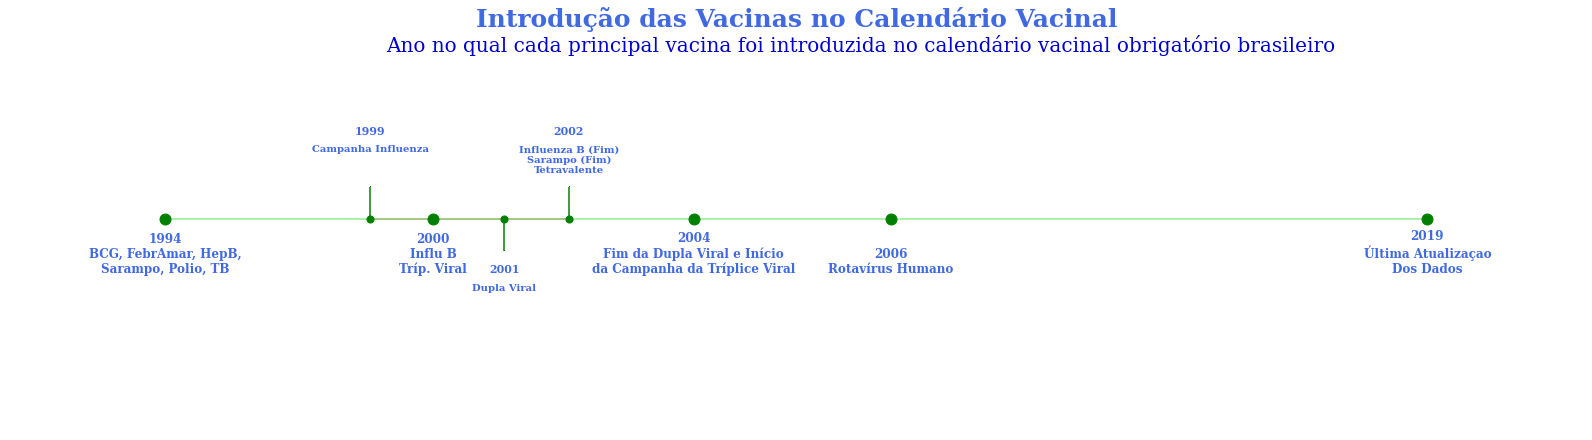

In [14]:
tl_dates = ['1994\nBCG, FebrAmar, HepB,\nSarampo, Polio, TB',
            '2000\nInflu B\nTríp. Viral',
            '2004\nFim da Dupla Viral e Início\nda Campanha da Tríplice Viral',
            '2006\nRotavírus Humano',
            '2019\nÚltima Atualizaçao\nDos Dados']

tl_x = [1, 2.7, 4.35, 5.6, 9]
tl_sub_x = [2.3, 3.15, 3.56]

tl_sub_times = ["1999", "2001", "2002"]
tl_text = ["Campanha Influenza", "Dupla Viral","Influenza B (Fim)\nSarampo (Fim)\nTetravalente"]

fig, ax = plt.subplots(figsize = (22, 6), constrained_layout = True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)

# desenha a linha
ax.axhline(0, xmin = 0.1, xmax = 0.9, c = 'lightgreen', zorder = 1)

# desenha os pontos
ax.scatter(tl_x, np.zeros(len(tl_x)), s = 120, c = 'green', zorder = 2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s = 30, c = 'green', zorder = 3)
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s = 50, c = 'green', zorder = 4)

# texto
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.5, date, ha = 'center', fontfamily = 'serif', fontweight = 'bold',
    color = 'royalblue', fontsize = 12)

# linhas verticais
levels = np.zeros(len(tl_sub_x))
levels[::-2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection = True)    
plt.setp(baseline, zorder = 0)
plt.setp(markerline, marker = ',', color = 'green')
plt.setp(stemline, color = 'green')

# texto
for idx, x, time, txt in zip(range(1, len(tl_sub_x) + 1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha = 'center', fontfamily = 'serif', fontweight = 'bold',
        color = 'royalblue', fontsize = 11)
    ax.text(x, 1.3*(idx%2)-0.6, txt, va = 'top', ha = 'center', fontweight = 'bold',
        fontfamily = 'serif', color = 'royalblue')

for spine in ['left', 'top', 'right', 'bottom']:
    ax.spines[spine].set_visible(False)

ax.set_xticks([]) 
ax.set_yticks([]) 

ax.set_title('Introdução das Vacinas no Calendário Vacinal',
             fontweight = 'bold', fontfamily = 'serif', fontsize = 25, color = 'royalblue')
ax.text(2.4, 1.57, 'Ano no qual cada principal vacina foi introduzida no calendário vacinal obrigatório brasileiro',
        fontfamily = 'serif', fontsize = 20, color = 'mediumblue')

plt.show()

Essas informações podem ser encontradas nas [Notas Técnicas sobre as Imunizações](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf).

É relavante notar que grande parte dos imunizantes foram introduzidos em 1994 e continuam os mesmos até os dias de hoje. Esses são:
- **BCG** (Contra Tuberculose);
- **FA** (Contra Febre Amarela);
- **HB** (Contra Hepatite B);
- **VOP** (Oral Contra Poliomielite);
- **DTP** (Tríplice Bacteriana).